C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


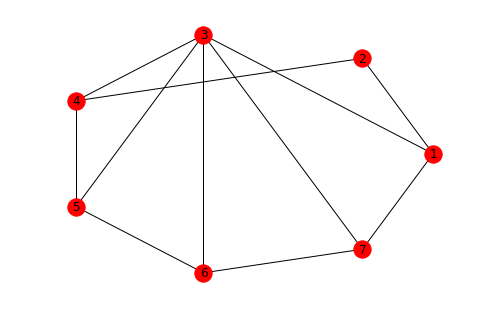

In [3]:
%matplotlib inline
import networkx as nx
import random
G=nx.Graph()


G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,4)
G.add_edge(4,3)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,3)
G.add_edge(3,5)
G.add_edge(1,7)
G.add_edge(7,3)
G.add_edge(7,6)


nx.draw_circular((G),with_labels=True)


## BFS

In [2]:
def bfs(G, origen, destino):
    
    cua=[]
    visitats=[]
    extended=0
    
    prev={}
    for i in G.node:
        prev[i]=None
    
    
    cua.append(origen)
    
    while len(cua)!=0:
        subtree=cua.pop(0)
        extended+=1

        if destino==subtree:
            return construct_path(prev,subtree,extended,origen)
        
        for i in G.neighbors(subtree):
            if i in visitats:
                continue
            
            if i not in visitats:
                prev[i]=(subtree)
                cua.append(i)
        
                visitats.append(i)
        
        
        

def construct_path(prev,destino,extended,origen):
    path=[]
    u=destino
    
    while u!=origen:
        path.append(u)
        
        u=prev[u]
    path.append(origen)
        
    path.reverse()
    
    return path , extended
    
    
            

In [3]:
bfs(G,1,5)

([1, 3, 5], 8)

In [4]:
def recBFS(G,origen,destino):
    
    prev={}
    visited=[origen]
    cua=[origen]
    for i in G.node:
        prev[i]=None
        
    
    BFS(G,origen,destino,prev,visited,cua)
    
    return construct_path(prev,destino,origen)
        
def BFS(G,origen,destino,prev,visited,cua):
    origen=cua.pop(0)
    if len(visited)!=len(G.nodes()):
        for i in G.neighbors(origen):
            if i not in visited:
                visited.append(i)
                prev[i]=origen
                cua.append(i)

                

        BFS(G,cua[0],destino,prev,visited,cua)
    
    
    

def construct_path(prev,destino,origen):
    path=[]
    u=destino
    
    while u!=origen:
        path.append(u)
        
        u=prev[u]
    path.append(origen)
        
    path.reverse()
    
    return path
    
    
    
    
    
    

In [5]:
recBFS(G,1,5)

[1, 3, 5]

In [6]:
def BFS_recursivo(G,origen):
    visited = {origen:None}
    queue = []
    queue.append(origen)
    
    bfs_rec2(visited,queue)
    
    return visited
    

def bfs_rec2(visited, queue):
    if len(queue) > 0:
        node = queue.pop(0)
        
        for neighbor in G.neighbors(node):
            if not neighbor in visited.keys():
                queue.append(neighbor)
                visited[neighbor]=node
                
        bfs_rec2(visited,queue)

In [7]:
BFS_recursivo(G,1)


{1: None, 2: 1, 3: 1, 4: 2, 5: 3, 6: 3, 7: 1}

## DFS ITERATIVO

In [8]:
def dfs(G, origen, destino, depth=0):
    
    pila=[origen]
    visited=[origen]
    prev={}
    expanded=0
    
    for i in G.node:
        prev[i]=None
    
    
    
    while len(pila)!=0:
        
        current=pila.pop(-1)
        
        if current==destino:
            return construct_path(prev,destino,origen,expanded)
        
        for i in G.neighbors(current):
            if i not in visited:
                pila.append(i)
                prev[i]=current
        visited.append(current)
        expanded+=1
        
    
    
    
def construct_path(prev,destino,origen,expanded):
    path=[]
    aux=destino
    
    
    while prev[aux]!=origen:
        path.append(aux)
        
        aux=prev[aux]
    path.append(aux)
    path.append(origen)
    
    path.reverse()
    
    return path, expanded

In [9]:
dfs(G,1,5)

([1, 7, 6, 3, 5], 4)

## DFS recursivo con origen-destino

In [10]:
def dfsMainRec(G, origen, destino):
    visited, prev = [], {}
    dfsRec(G, origen, destino, visited, prev)
    return {
        'path' : construct_path(prev, destino, origen) ,
        'expanded' : len(visited)
        }

def dfsRec(G, nodo, destino, visited, prev):
    if destino not in visited:
        visited.append(nodo)
        for v in G.neighbors(nodo):
            if not v in visited:
                prev[v] = nodo
                dfsRec(G,v,destino,visited,prev)
                
def construct_path(prev, destino, origen):
    path = []
    u = destino
    while u != origen:
        path.append(u)
        u = prev[u]
    path.append(origen)
    path.reverse()
    return path

In [11]:
dfsMainRec(G,1,5)

{'expanded': 6, 'path': [1, 2, 4, 3, 6, 5]}

## DFS solo con origen

In [12]:
def recDFS2(G,origen):
    visited=[]
    prev={}
    
    for i in G.nodes():
        prev[i]=None
    
    recDFS2_aux(G,origen,prev,visited)
    
    return prev
    
def recDFS2_aux(G,origen,prev,visited):
    
    if len(visited)!=len(G.nodes()):
        visited.append(origen)
        
        for i in G.neighbors(origen):
            if i not in visited:
                prev[i]=origen
                recDFS2_aux(G,i,prev,visited)
    
    

In [13]:
recDFS2(G,1)

{1: None, 2: 1, 3: 4, 4: 2, 5: 6, 6: 3, 7: 6}

In [14]:
def DFS_iterativo(G,origen):
    visitados = []
    stack = []
    prev = {}
    
    for nodes in G.nodes():
        prev[nodes] = None
    
    stack.append(origen)
    
    while len(stack) > 0:
        minimun = stack.pop()
        if minimun not in visitados:
            visitados.append(minimun)
            for v in range(-1,-len(G.neighbors(minimun))-1,-1):
                n = G.neighbors(minimun)[v]
                if n not in visitados:
                    prev[n]=minimun
                    stack.append(n)
    
    return visitados

In [15]:
DFS_iterativo(G,1)

TypeError: object of type 'dict_keyiterator' has no len()

## Linealizar

In [16]:
def dfs_rec_try(G):
    visited ={}
    previ = {}
    for node in G.nodes():
        visited[node]=False
        previ[node]= None
    for node in G.nodes():
        if visited[node]==False:
            explore(G,node,visited,previ)
    return previ
            
def explore(G,node,visited,previ):
    if(visited[node]==True):
        return
    else:
        visited[node]=True
        for vei in G.neighbors(node):
            previ[vei] = node
            explore(G,vei,visited,previ)
UG = nx.Graph()
UG.add_edges_from((('S','E'),('S','D'),('S','C'),('S','A'),('D','E'),('B','A'),('C','B')))
dfs_rec_try(UG)

{'A': 'S', 'B': 'A', 'C': 'B', 'D': 'S', 'E': 'D', 'S': 'A'}

## Bellman-Ford

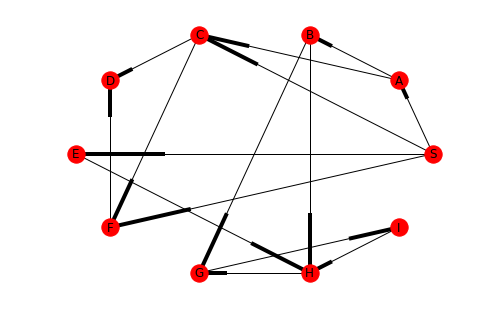

In [17]:
'''
Bellman ford
'''
G2=nx.DiGraph()

G2.add_nodes_from(['S','A','B','C','D','E','F','G'])

G2.add_edge('S','A',weight=10)
G2.add_edge('S','G',weight=8)
G2.add_edge('G','F',weight=1)
G2.add_edge('F','E',weight=-1)
G2.add_edge('D','E',weight=-1)
G2.add_edge('C','D',weight=3)
G2.add_edge('B','C',weight=1)
G2.add_edge('B','A',weight=1)
G2.add_edge('F','A',weight=-4)
G2.add_edge('A','E',weight=2)
G2.add_edge('E','B',weight=-2)


G6=nx.DiGraph()

G6.add_nodes_from(['S','A','B','C','D','E','F','G','H','I'])

G6.add_edge('S','A',weight=7)
G6.add_edge('A','C',weight=-2)
G6.add_edge('A','B',weight=4)

G6.add_edge('S','C',weight=6)
G6.add_edge('S','F',weight=5)
G6.add_edge('S','E',weight=6)

G6.add_edge('C','D',weight=2)
G6.add_edge('C','F',weight=1)
G6.add_edge('B','G',weight=-2)

G6.add_edge('B','H',weight=-4)
G6.add_edge('H','G',weight=1)
G6.add_edge('G','I',weight=-1)

G6.add_edge('I','H',weight=1)
G6.add_edge('E','H',weight=3)
G6.add_edge('F','D',weight=3)







nx.draw_circular((G6),with_labels=True)


In [18]:
def bellman_ford(G2,origen,infinity=float('inf')):
    
    prev,dist={},{}
    for i in G2.node:
        prev[i]=None
        dist[i]=infinity
    dist[origen]=0
    
    
    
    for i in range(len(G2.nodes())-1):
        for u,v in G2.edges():
            if dist[v]>dist[u]+G2[u][v]['weight']:
                dist[v]=dist[u]+G2[u][v]['weight']
                prev[v]=u

        
    for u,v in G2.edges():
        if dist[v]>dist[u]+G2[u][v]['weight']:
            return dist,("hay ciclos negativos")

        else:
            return dist,("no hay ciclos negativos")
        
            
            
        
        
    

In [19]:
bellman_ford(G2,'S')

({'A': 5, 'B': 5, 'C': 6, 'D': 9, 'E': 7, 'F': 9, 'G': 8, 'S': 0},
 'no hay ciclos negativos')

## Conexos

In [20]:
def DFS_iterativo(G,origen):
    visitados = []
    stack = []
    prev = {}
    
    for nodes in G.nodes():
        prev[nodes] = None
    
    stack.append(origen)
    
    while len(stack) > 0:
        minimun = stack.pop(-1)
        if minimun not in visitados:
            visitados.append(minimun)
            for v in G.neighbors(minimun):
                if v not in visitados:
                    prev[v]=minimun
                    stack.append(v)
    
    return visitados

In [21]:
def BFS_iterativo(G,origen):
    visitados=[]
    cua=[origen]
    prev={}
    
    for i in G.nodes():
        prev[i]=None
    
    while len(cua)!=0:
        minim=cua.pop()
        for i in G.neighbors(minim):
            if i not in visitados:
                prev[i]=minim
                cua.append(i)
                visitados.append(i)
    return visitados

In [22]:
G20=nx.Graph()

G20.add_nodes_from([1,2,3,4,5])

G20.add_edge(1,2)
G20.add_edge(2,3)
G20.add_edge(4,5)
G20.add_edge(9,10)


In [23]:
def conexos(G):
    lista = []
    arbol = []
    
    for node in G.nodes():
        lista.append(node)
    
    while len(lista)>0:
        
        node = lista[0]
        subarbol = BFS_iterativo(G,node)
        #subarbol = DFS_iterativo(G,node)
        
        arbol.append(subarbol)
        
        for node in subarbol:
            if node in lista:
                lista.remove(node)
    
    return arbol

In [24]:
conexos(G20)

[[2, 1, 3], [5, 4], [10, 9]]

## Euler

In [25]:
G21=nx.Graph()
G21.add_nodes_from([1,2,3,4,5,6,7,8,9,10])
G21.add_edges_from(((1,2),(1,7),(2,3),(2,6),(2,10),(2,9),(2,8),(3,4),(3,6),(3,7),(4,5),(5,6),(6,7),(7,8),(7,9),(7,10)))

In [26]:
"""
Un grafo es euleriano si todos los vertices 'u' tienen grado par,
retorna True o False
"""
def isEulerian(G):
    return all(G.degree(u) % 2 == 0 for u in G)

"""
Retorna la lista de vertices 'v' conectados a un vertice 'u'
"""
def edgeList(G, u):
    return [v for v in G.neighbors(u)]

"""
Lo usamos para comprobar que quedan aristas libres desde donde estamos y no estamos atascados,
Retorna False si estamos atascados y True si hay camino
"""
def freeAristas(G, u, aristasVisitadas):
    visited = 0
    for v in aristasVisitadas:
        if u in v:
            visited += 1
    return visited == G.degree(u)

"""
Retorna un camino euleriano e imprime su circuito
"""
def eulerCami(G):
    origen = random.choice(list(G.node)) # porque usa la libreria nx y la lista no esta tal cual
    nAristas = len(G.edges())
    aristasVisitadas = []
    circuit = []
    path = []
    while len(aristasVisitadas) != nAristas:
        destino = random.choice(edgeList(G,origen))
        origenDestino = (min((origen, destino)),max((origen, destino)))
        if freeAristas(G, origen, aristasVisitadas):
            aristasVisitadas.pop()
            circuit.pop()
            path.pop()
            origenDestino = (min((origen, destino)),max((origen, destino)))
            destino = random.choice(edgeList(G,path[-1]))
            origen = path[-2]
        if origenDestino not in aristasVisitadas and origenDestino in G.edges():
            aristasVisitadas.append(origenDestino)
            circuit.append((origen,destino))
            path.append(origen)
            origen = destino
    path.append(path[0])
    
    print("Circuito Euleriano:",circuit)
    return path

"""
Si un grafo es euleriano, busca un camino mientras no lo haya encontrado y lo retorna
"""
def euler(G):
    if isEulerian(G):
        return eulerCami(G)
    else:
        return ("G No es euleriano")

Circuito Euleriano: [(3, 7), (7, 10), (10, 2), (2, 1), (1, 7), (7, 9), (9, 2), (2, 6), (6, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 2), (2, 3)]


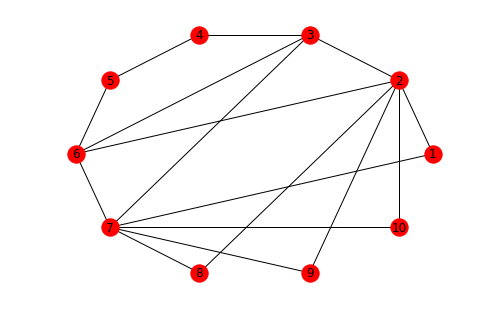

In [27]:

euler(G21)

nx.draw_circular(G21, with_labels=True)

## Trobar cicle en graf dirigit, NO VA

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


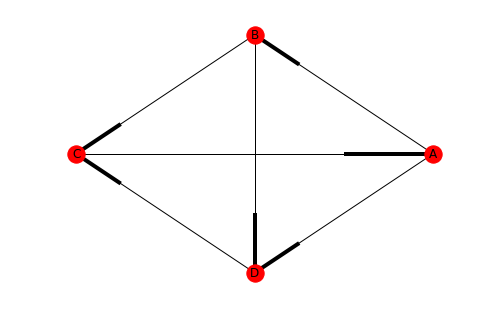

In [7]:
IG=nx.DiGraph()

IG.add_nodes_from(['A','B','C','D'])

IG.add_edge('A','B')
IG.add_edge('A','D')
IG.add_edge('B','D')
IG.add_edge('B','C')
IG.add_edge('D','C')
IG.add_edge('C','A')
nx.draw_circular(IG, with_labels=True)

In [8]:
WG = nx.DiGraph()
WG.add_edges_from(((1,2),(2,3),(3,4),(4,5),(5,6)))

In [9]:
def lin_metode2(G):
    L = []
    S = []
    for node in G.nodes():
        if(G.in_degree(node)==0):
            S.append(node) 

    while len(S)!=0:
        node = S[0]
        L.append(node)

        for node1,node2 in list(G.edges()):
            if(node1==node):
                G.remove_edge(node1,node2)
            if(G.in_degree(node2)==0):
                S.append(node2)
        del S[0]
    if(len(G.edges())!=0):
        print("Error, el graf té al menys un cicle")
    else:
        return L



In [10]:
lin_metode2(IG)

Error, el graf té al menys un cicle


In [13]:
def isCyclic(G, u, visited, prev, path): 
    # Pone en visitado el actual
    visited[u]= True
    # Recorre los vecinos
    for v in list(G.neighbors(u)):
        # Si el vecino no está visitado le visitamos 
        if not visited[v]:
            if isCyclic(G,v,visited,u,path):
                path.append(v)
                return True
        # Si un vecino está visitado y su padre no hay un ciclo
        elif  prev != v:
            path.append(v)
            return True
    path=[]
    return False

def detect_cycle(G):
    path = []
    visited = {}
    for u in G.node:
        visited[u] = False
    for u in G.nodes(): 
        if not visited[u]: #Don't recur for u if it is already visited 
            if isCyclic(G,u,visited,-1,path):
                path.append(path[0])
                path.reverse()
                return True, path
    return False, path

In [15]:
detect_cycle(IG)

(True, ['A', 'B', 'D', 'C', 'A'])